# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

41


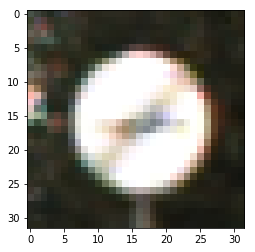

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
print(y_train[150])

plt.figure(1)
plt.imshow(X_train[150])

In [5]:
import numpy as np

def normalize(x):
    axis = tuple(range(len(x.shape) - 1))
    mean = np.mean(x, axis=axis)
    std = np.std(x, axis=axis)
    print('Mean: ', mean)
    print('Std: ', std)
    x = x - mean
    x = x / std

    norm_mean = np.mean(x, axis=axis)
    norm_std = np.std(x, axis=axis)
    print('Normalized Mean: ', norm_mean)
    print('Normalized Std: ', norm_std)
    
    return x

def rgb2grayscale(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return np.expand_dims(gray, axis=2)

X_train = np.array([np.append(x, rgb2grayscale(x), axis=2) for x in X_train])
X_valid = np.array([np.append(x, rgb2grayscale(x), axis=2) for x in X_valid])
X_test = np.array([np.append(x, rgb2grayscale(x), axis=2) for x in X_test])

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

Mean:  [ 86.69812205  79.49594061  81.83870445  81.90779813]
Std:  [ 69.28387882  66.26993615  67.76634548  66.12725089]
Normalized Mean:  [  7.49232908e-13  -4.20496332e-13   6.72432958e-14  -5.48547428e-12]
Normalized Std:  [ 1.  1.  1.  1.]
Mean:  [ 87.29950663  80.39230863  82.97746687  82.74353892]
Std:  [ 70.75482467  68.36359299  70.34695149  68.05172671]
Normalized Mean:  [ -2.57508085e-13  -8.53750424e-14  -6.10784958e-13   6.12820325e-14]
Normalized Std:  [ 1.  1.  1.  1.]
Mean:  [ 85.91491813  78.83244012  81.69802283  81.26818598]
Std:  [ 69.47602748  67.04509675  69.49748921  66.73526917]
Normalized Mean:  [  9.26439122e-14   7.75985303e-14   7.33438224e-14   1.23499764e-11]
Normalized Std:  [ 1.  1.  1.  1.]


### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

mu = 0.
std = 0.1

def conv(x, filter_size, filter_num, padding='SAME'):
    _, _, _, depth = x.get_shape().as_list()
    filter_weights = tf.Variable(tf.truncated_normal((filter_size, filter_size, depth, filter_num), mu, std))
    filter_biases = tf.Variable(tf.zeros(filter_num))
    stride = (1, 1, 1, 1)
    return tf.nn.bias_add(tf.nn.conv2d(x, filter_weights, stride, padding), filter_biases)

def pool(x):
    return tf.nn.max_pool(x, (1, 2, 2, 1), (1, 2, 2, 1), 'VALID')

def fc(x, output_num):
    _, input_num = x.get_shape().as_list()
    fc_weights = tf.Variable(tf.truncated_normal((input_num, output_num), mu, std))
    fc_biases = tf.Variable(tf.zeros(output_num))
    return tf.nn.bias_add(tf.matmul(x, fc_weights), fc_biases)

# reference: https://github.com/ry/tensorflow-resnet/blob/master/resnet.py#L227
def batch_norm(x, is_training):
    x_shape = x.get_shape()
    params_shape = x_shape[-1:]

    axis = list(range(len(x_shape) - 1))

    beta = tf.Variable(tf.zeros(params_shape))
    gamma = tf.Variable(tf.ones(params_shape))

    moving_mean = tf.Variable(tf.zeros(params_shape), trainable=False)
    moving_variance = tf.Variable(tf.ones(params_shape), trainable=False)

    # These ops will only be preformed when training.
    mean, variance = tf.nn.moments(x, axis)
    update_moving_mean = moving_averages.assign_moving_average(
        moving_mean, mean, BN_DECAY)
    update_moving_variance = moving_averages.assign_moving_average(
        moving_variance, variance, BN_DECAY)
    tf.add_to_collection(UPDATE_OPS_COLLECTION, update_moving_mean)
    tf.add_to_collection(UPDATE_OPS_COLLECTION, update_moving_variance)

    mean, variance = control_flow_ops.cond(
        is_training, lambda: (mean, variance),
        lambda: (moving_mean, moving_variance))

    x = tf.nn.batch_normalization(x, mean, variance, beta, gamma, BN_EPSILON)
    
    return x

def lenet(x):
    conv1 = conv(x, 5, 6, 'VALID')
    conv1 = tf.nn.relu(conv1)
    conv1 = pool(conv1)
    
    conv2 = conv(conv1, 5, 16, 'VALID')
    conv2 = tf.nn.relu(conv2)
    conv2 = pool(conv2)
    
    fc0 = flatten(conv2)
    
    fc1 = fc(fc0, 120)
    fc1 = tf.nn.relu(fc1)
    
    fc2 = fc(fc1, 84)
    fc2 = tf.nn.relu(fc2)
    
    logits = fc(fc2, 43)
    
    return logits

def mynet(x):
    conv1 = conv(x, 3, 6)
    conv1 = tf.nn.relu(conv1)
    conv1 = pool(conv1)
    
    conv2 = conv(conv1, 3, 16)
    conv2 = tf.nn.relu(conv2)
    conv2 = pool(conv2)
    
    conv3 = conv(conv2, 3, 16)
    conv3 = tf.nn.relu(conv3)
    conv3 = pool(conv3)
    
    fc0 = flatten(conv3)
    
    fc1 = fc(fc0, 120)
    fc1 = tf.nn.relu(fc1)
    
    fc2 = fc(fc1, 84)
    fc2 = tf.nn.relu(fc2)
    
    logits = fc(fc2, 43)
    
    return logits

def mynet2(x):
    conv1_1 = conv(x, 3, 6)
    conv1_1 = tf.nn.relu(conv1_1)
    conv1_2 = conv(conv1_1, 3, 6)
    conv1_2 = tf.nn.relu(conv1_2)
    conv1 = pool(conv1_2)
    
    conv2_1 = conv(conv1, 3, 16)
    conv2_1 = tf.nn.relu(conv2_1)
    conv2_2 = conv(conv2_1, 3, 16)
    conv2_2 = tf.nn.relu(conv2_2)
    conv2_3 = conv(conv2_2, 3, 16)
    conv2_3 = tf.nn.relu(conv2_3)
    conv2 = pool(conv2_2)
    
    conv3_1 = conv(conv2, 3, 16)
    conv3_1 = tf.nn.relu(conv3_1)
    conv3_2 = conv(conv3_1, 3, 16)
    conv3_2 = tf.nn.relu(conv3_2)
    
    fc0 = flatten(conv3_2)
    
    fc1 = fc(fc0, 120)
    fc1 = tf.nn.relu(fc1)
    
    fc2 = fc(fc1, 84)
    fc2 = tf.nn.relu(fc2)
    
    logits = fc(fc2, 43)
    
    return logits

In [7]:
from tensorflow.python.training import moving_averages
from tensorflow.python.ops import control_flow_ops

MOVING_AVERAGE_DECAY = 0.9997
BN_DECAY = MOVING_AVERAGE_DECAY
BN_EPSILON = 0.001
UPDATE_OPS_COLLECTION = 'mynet-bn-updates'

def mynet3(x, is_training, keep_prob):
    with tf.variable_scope('conv1'):
        conv1_1 = conv(x, 3, 16)
        conv1_1 = batch_norm(conv1_1, is_training)
        conv1_1 = tf.nn.dropout(conv1_1, keep_prob=keep_prob)
        conv1_1 = tf.nn.elu(conv1_1)
        conv1_2 = conv(conv1_1, 3, 16)
        conv1_2 = batch_norm(conv1_2, is_training)
        conv1_2 = tf.nn.dropout(conv1_2, keep_prob=keep_prob)
        conv1_2 = tf.nn.elu(conv1_2)
        conv1 = pool(conv1_2)
    
    with tf.variable_scope('conv2'):
        conv2_1 = conv(conv1, 3, 16)
        conv2_1 = batch_norm(conv2_1, is_training)
        conv2_1 = tf.nn.dropout(conv2_1, keep_prob=keep_prob)
        conv2_1 = tf.nn.elu(conv2_1)
        conv2_2 = conv(conv2_1, 3, 16)
        conv2_2 = batch_norm(conv2_2, is_training)
        conv2_2 = tf.nn.dropout(conv2_2, keep_prob=keep_prob)
        conv2_2 = tf.nn.elu(conv2_2)
        conv2_3 = conv(conv2_2, 3, 16)
        conv2_3 = batch_norm(conv2_3, is_training)
        conv2_3 = tf.nn.dropout(conv2_3, keep_prob=keep_prob)
        conv2_3 = tf.nn.elu(conv2_3)
        conv2_4 = conv(conv2_3, 3, 16)
        conv2_4 = batch_norm(conv2_4, is_training)
        conv2_4 = tf.nn.dropout(conv2_4, keep_prob=keep_prob)
        conv2_4 = tf.nn.elu(conv2_4)
        conv2_5 = conv(conv2_4, 3, 16)
        conv2_5 = batch_norm(conv2_5, is_training)
        conv2_5 = tf.nn.dropout(conv2_5, keep_prob=keep_prob)
        conv2_5 = tf.nn.elu(conv2_5)
        conv2_6 = conv(conv2_5, 3, 16)
        conv2_6 = batch_norm(conv2_6, is_training)
        conv2_6 = tf.nn.dropout(conv2_6, keep_prob=keep_prob)
        conv2_6 = tf.nn.elu(conv2_6)
        conv2_7 = conv(conv2_6, 3, 16)
        conv2_7 = batch_norm(conv2_7, is_training)
        conv2_7 = tf.nn.dropout(conv2_7, keep_prob=keep_prob)
        conv2_7 = tf.nn.elu(conv2_7)
        conv2 = pool(conv2_7)
    
    with tf.variable_scope('conv3'):
        conv3_1 = conv(conv2, 3, 16)
        conv3_1 = batch_norm(conv3_1, is_training)
        conv3_1 = tf.nn.dropout(conv3_1, keep_prob=keep_prob)
        conv3_1 = tf.nn.elu(conv3_1)
        conv3_2 = conv(conv3_1, 3, 16)
        conv3_2 = batch_norm(conv3_2, is_training)
        conv3_2 = tf.nn.dropout(conv3_2, keep_prob=keep_prob)
        conv3_2 = tf.nn.elu(conv3_2)
    
    with tf.variable_scope('fc'):
        fc0 = flatten(conv3_2)

        fc1 = fc(fc0, 120)
        fc1 = tf.nn.elu(fc1)

        fc2 = fc(fc1, 84)
        fc2 = tf.nn.elu(fc2)

        logits = fc(fc2, 43)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [8]:
X = tf.placeholder(tf.float32, shape=(None, 32, 32, 4), name='X')
y = tf.placeholder(tf.int32, shape=(None,), name='y')
y_one_hot = tf.one_hot(y, n_classes, name='y_one_hot')

is_training = tf.placeholder(tf.bool, name='is_training')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

logits = mynet3(X, is_training, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
loss_op = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

# reference: https://github.com/ry/tensorflow-resnet/blob/master/resnet_train.py#L66
batchnorm_updates = tf.get_collection(UPDATE_OPS_COLLECTION)
batchnorm_updates_op = tf.group(*batchnorm_updates)
train_op = tf.group(optimizer.minimize(loss_op), batchnorm_updates_op)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, is_training: False, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

EPOCH 1 ...
Validation Accuracy = 0.27959
Train Accuracy = 0.30061
Loss = 3.35950

EPOCH 11 ...
Validation Accuracy = 0.89184
Train Accuracy = 0.96049
Loss = 0.27567

EPOCH 21 ...
Validation Accuracy = 0.92290
Train Accuracy = 0.98899
Loss = 0.12021

EPOCH 31 ...
Validation Accuracy = 0.92472
Train Accuracy = 0.99399
Loss = 0.07532

EPOCH 41 ...
Validation Accuracy = 0.94694
Train Accuracy = 0.99897
Loss = 0.05142

EPOCH 51 ...
Validation Accuracy = 0.95714
Train Accuracy = 0.99931
Loss = 0.03886

EPOCH 61 ...
Validation Accuracy = 0.95488
Train Accuracy = 0.99879
Loss = 0.03069

EPOCH 71 ...
Validation Accuracy = 0.95850
Train Accuracy = 0.99974
Loss = 0.03054

EPOCH 81 ...
Validation Accuracy = 0.95918
Train Accuracy = 0.99899
Loss = 0.02538

EPOCH 91 ...
Validation Accuracy = 0.96054
Train Accuracy = 0.99986
Loss = 0.02146

Model saved.


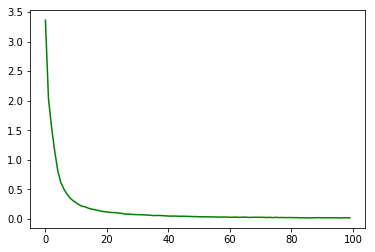

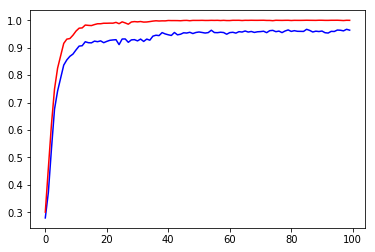

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

BATCH_SIZE = 1024
EPOCH_NUM = 100

config = tf.ConfigProto()
config.graph_options.optimizer_options.global_jit_level = tf.OptimizerOptions.ON_1

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    losses = []
    validation_accuracies = []
    train_accuracies = []
    for i in range(EPOCH_NUM):
        X_train, y_train = shuffle(X_train, y_train)
        loss_total = 0.
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            X_batch, y_batch = X_train[offset:end], y_train[offset:end]
            loss_batch, _ = sess.run([loss_op, train_op], feed_dict={X: X_batch, y: y_batch, is_training: True, keep_prob: 0.75})
            loss_total += loss_batch * len(X_batch)
        
        loss = loss_total / n_train
        losses.append(loss)
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracies.append(validation_accuracy)
        train_accuracy = evaluate(X_train, y_train)
        train_accuracies.append(train_accuracy)
        
        if i % 10 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.5f}".format(validation_accuracy))
            print("Train Accuracy = {:.5f}".format(train_accuracy))
            print("Loss = {:.5f}".format(loss_total / n_train))
            print()
        
    saver.save(sess, "./traffic")
    print("Model saved.")

plt.figure(1)
plt.plot(range(EPOCH_NUM), losses, 'g')
    
plt.figure(2)
plt.plot(range(EPOCH_NUM), validation_accuracies, 'b',
         range(EPOCH_NUM), train_accuracies, 'r')

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 